# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
# https://www.kaggle.com/datasets/datascientistanna/customers-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('/content/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


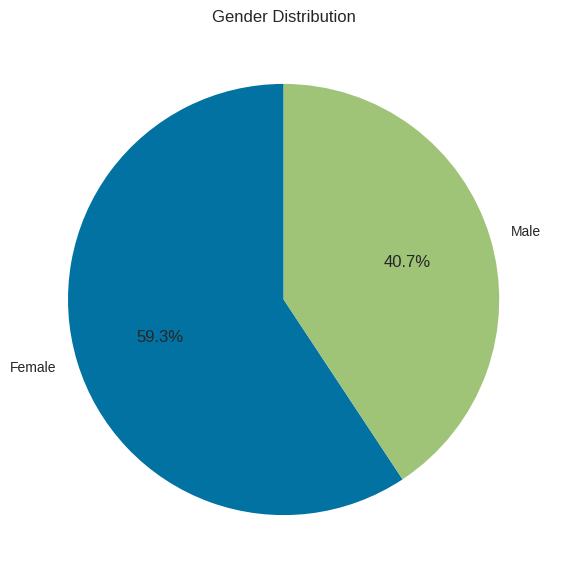

In [5]:
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

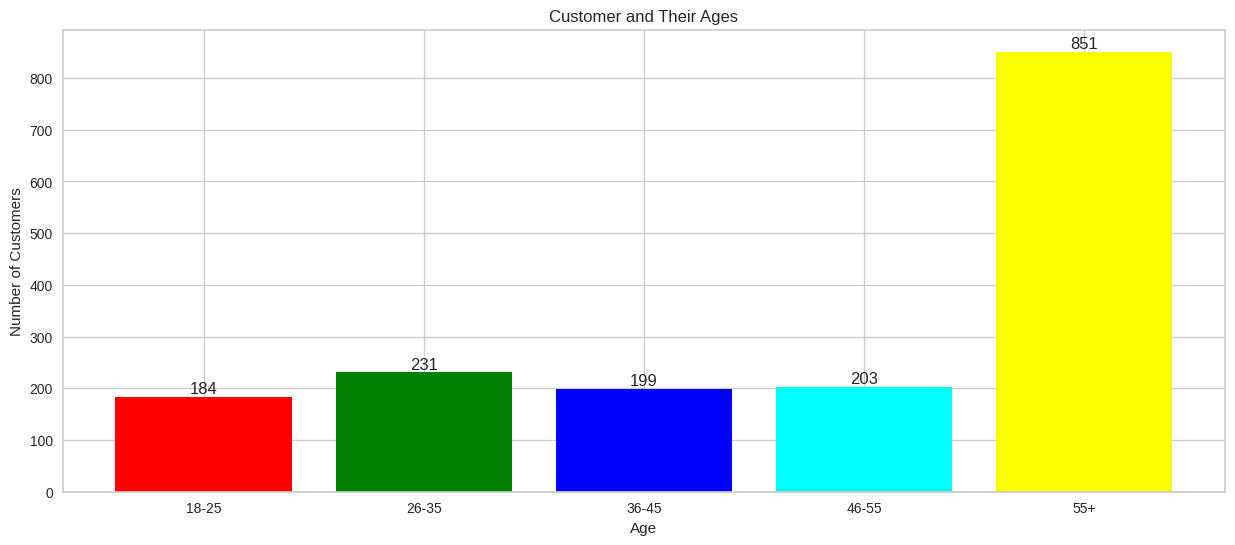

In [6]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

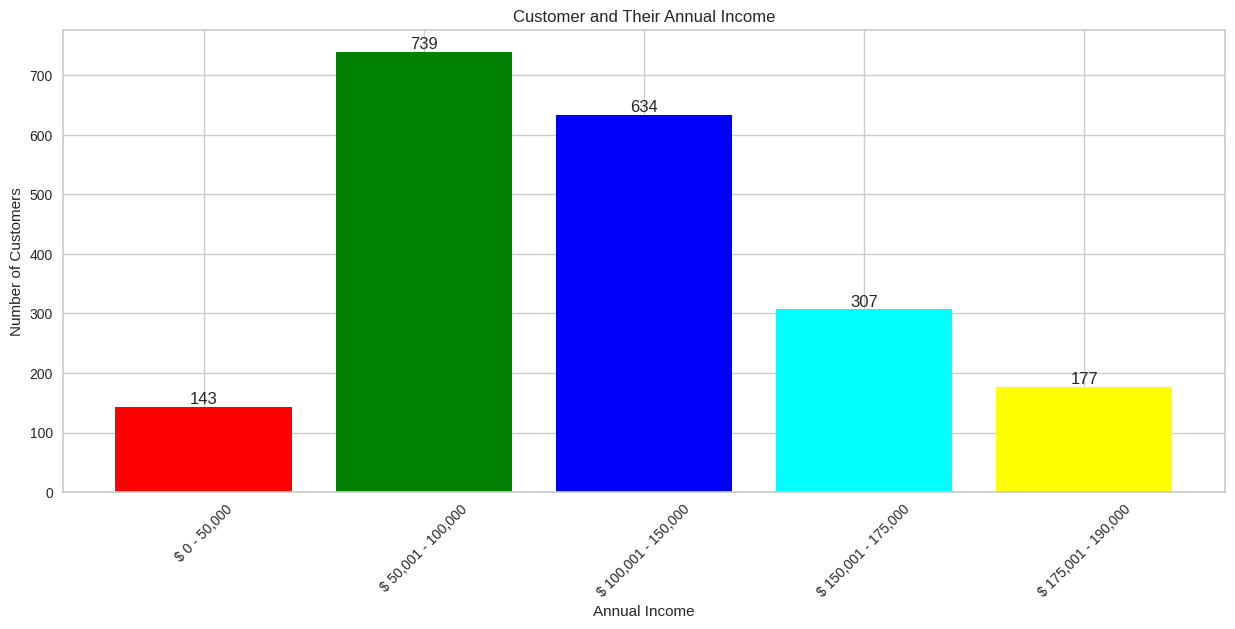

In [7]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 0) & (df["Annual Income ($)"] <= 50000)]
ai31_75 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 50001) & (df["Annual Income ($)"] <= 100000)]
ai76_125 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 100001) & (df["Annual Income ($)"] <= 150000)]
ai126_175 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 150001) & (df["Annual Income ($)"] <= 175000)]
ai176_190 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 175001) & (df["Annual Income ($)"] <= 190000)]

# Menyusun data untuk plotting
aix = ["$ 0 - 50,000", "$ 50,001 - 100,000", "$ 100,001 - 150,000", "$ 150,001 - 175,000", "$ 175,001 - 190,000"]
aiy = [len(ai0_30.values), len(ai31_75.values), len(ai76_125.values), len(ai126_175.values), len(ai176_190.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
    plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

In [8]:
X = df[['Annual Income ($)', 'Spending Score (1-100)' , 'Gender']].values

print(pd.DataFrame(X, columns=['Annual Income ($)', 'Spending Score (1-100)', 'Gender']))

     Annual Income ($) Spending Score (1-100)  Gender
0                15000                     39    Male
1                35000                     81    Male
2                86000                      6  Female
3                59000                     77  Female
4                38000                     40  Female
...                ...                    ...     ...
1995            184387                     40  Female
1996             73158                     32  Female
1997             90961                     14    Male
1998            182109                      4    Male
1999            110610                     52    Male

[2000 rows x 3 columns]


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [9]:
import pandas as pd

# Membaca data
dataset = pd.read_csv('/content/Customers.csv')

# Menampilkan jumlah nilai kosong sebelum di-drop
print("Sebelum dropna:")
print(dataset.isnull().sum())

# Menghapus baris dengan nilai kosong
dataset = dataset.dropna()

# Menampilkan jumlah nilai kosong setelah di-drop
print("\nSetelah dropna:")
print(dataset.isnull().sum())

Sebelum dropna:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Setelah dropna:
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [10]:
import pandas as pd

dataset = pd.read_csv('/content/Customers.csv')
print(dataset.duplicated().sum())

print(dataset.head())

0
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [12]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Encode kolom 'Gender'
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Lakukan scaling
scaler = MinMaxScaler()
dataset[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']] = scaler.fit_transform(
    dataset[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']]
)

# Tampilkan hasil
print(dataset[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']].head())


   Annual Income ($)  Spending Score (1-100)  Gender
0           0.078958                    0.39     1.0
1           0.184236                    0.81     1.0
2           0.452694                    0.06     0.0
3           0.310569                    0.77     0.0
4           0.200027                    0.40     0.0


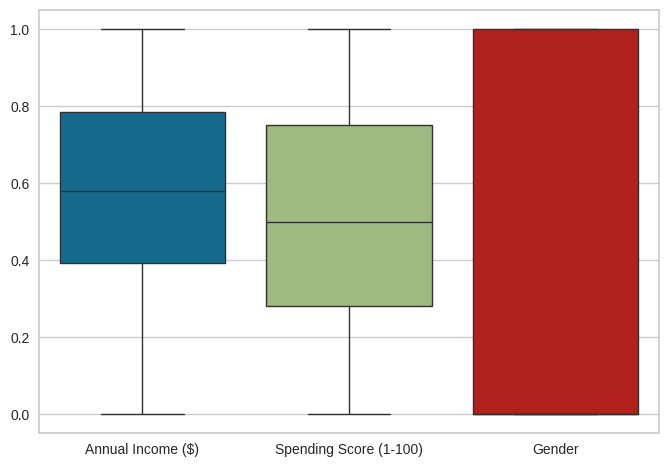

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataset[['Annual Income ($)', 'Spending Score (1-100)' , 'Gender']])
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

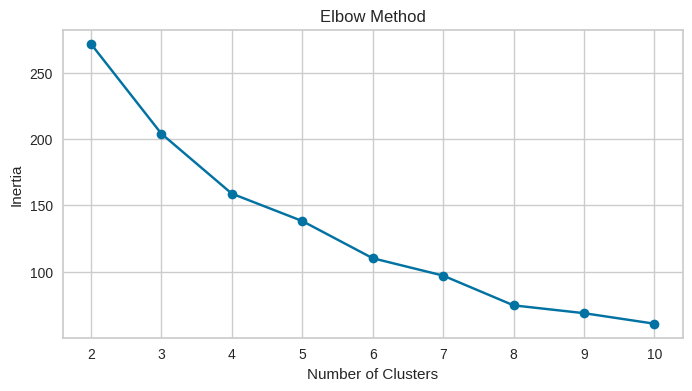

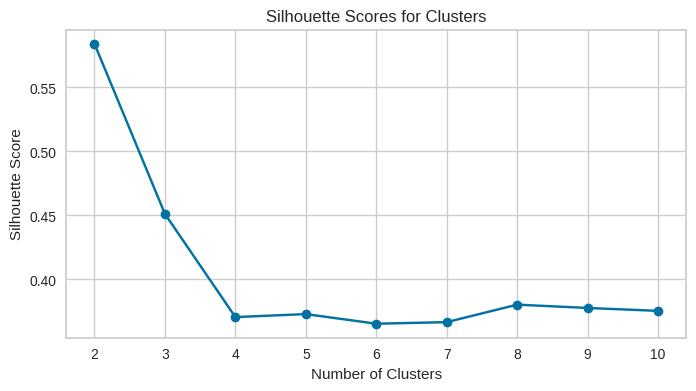

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouette_scores = []
clustering_data = dataset[['Annual Income ($)', 'Spending Score (1-100)' , 'Gender']].values

for k in range(2, 11):  # Jumlah cluster 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data, labels))

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Sesuaikan parameter eps dan min_samples
labels_dbscan = dbscan.fit_predict(dataset[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']])

# Evaluasi Silhouette Score untuk DBSCAN (hanya jika ada lebih dari 1 cluster)
if len(set(labels_dbscan)) > 1:  # DBSCAN bisa memberikan label -1 untuk noise
    silhouette_dbscan = silhouette_score(dataset[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']], labels_dbscan)
    print(f'Silhouette Score DBSCAN: {silhouette_dbscan}')
else:
    print("DBSCAN menghasilkan hanya satu cluster atau noise, silhouette score tidak dapat dihitung.")


Silhouette Score DBSCAN: 0.5841225177254019


In [24]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA (misalnya menjadi 2 dimensi)
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']])

# KMeans dengan PCA (menggunakan 2 dimensi hasil PCA)
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Coba dengan jumlah cluster optimal yang Anda tentukan
kmeans_pca.fit(dataset_pca)
labels_pca = kmeans_pca.labels_

# Evaluasi dengan Silhouette Score
sil_score_pca = silhouette_score(dataset_pca, labels_pca)
print(f'Silhouette Score dengan PCA: {sil_score_pca}')


Silhouette Score dengan PCA: 0.6465743485816463


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

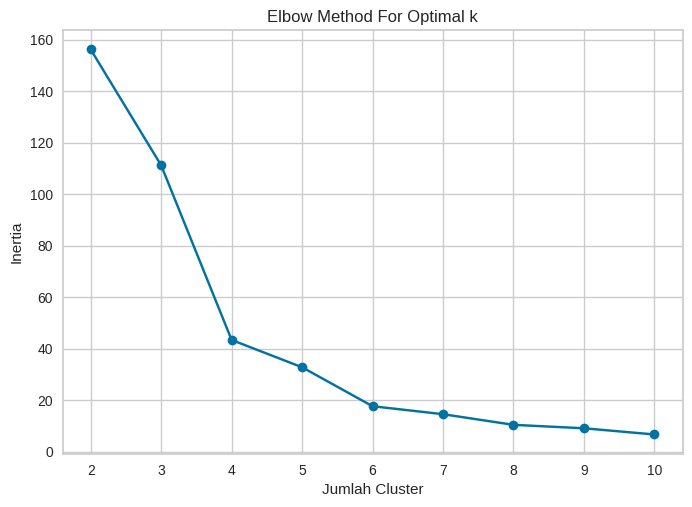

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tentukan range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)  # Coba jumlah cluster antara 2 sampai 10
inertia = []

# Uji KMeans untuk setiap jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(dataset_pca)  # Gunakan dataset setelah PCA
    inertia.append(kmeans.inertia_)  # Simpan nilai inertia

# Plot Elbow Curve
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()


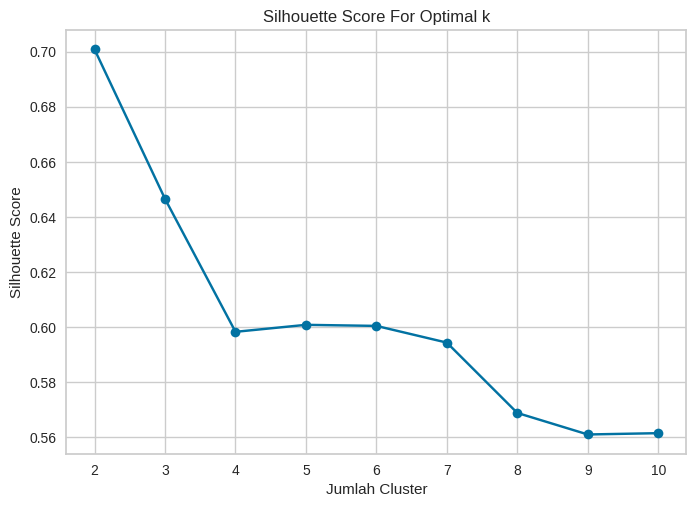

Jumlah Cluster: 2, Silhouette Score: 0.7008579179747626
Jumlah Cluster: 3, Silhouette Score: 0.6465743485816463
Jumlah Cluster: 4, Silhouette Score: 0.598288340755076
Jumlah Cluster: 5, Silhouette Score: 0.6008257589429361
Jumlah Cluster: 6, Silhouette Score: 0.6004358824910219
Jumlah Cluster: 7, Silhouette Score: 0.5943635440625754
Jumlah Cluster: 8, Silhouette Score: 0.5688156373714826
Jumlah Cluster: 9, Silhouette Score: 0.5609957951090607
Jumlah Cluster: 10, Silhouette Score: 0.5614695773203989


In [26]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tentukan range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)  # Coba jumlah cluster antara 2 sampai 10
silhouette_scores = []

# Uji KMeans untuk setiap jumlah cluster dan hitung Silhouette Score
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(dataset_pca)  # Gunakan dataset setelah PCA
    labels = kmeans.labels_

    # Hitung silhouette score untuk jumlah cluster ini
    silhouette_avg = silhouette_score(dataset_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Tampilkan hasil Silhouette Score untuk setiap jumlah cluster
for n_clusters, score in zip(range_n_clusters, silhouette_scores):
    print(f"Jumlah Cluster: {n_clusters}, Silhouette Score: {score}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lakukan Variance Threshold (contoh threshold = 0.1)
selector = VarianceThreshold(threshold=0.1)
dataset_selected = selector.fit_transform(dataset[['Annual Income ($)', 'Spending Score (1-100)', 'Gender']])

# Model clustering dengan KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dataset_selected)
labels = kmeans.labels_

# Evaluasi dengan Silhouette Score
sil_score_selected = silhouette_score(dataset_selected, labels)
print(f'Silhouette Score setelah Feature Selection: {sil_score_selected}')

# Bandingkan dengan hasil sebelumnya
sil_score_before = 0.6465743485816463  # Misalkan ini nilai Silhouette Score sebelumnya
print(f'Perbandingan: {sil_score_selected} (setelah) vs {sil_score_before} (sebelum)')


Silhouette Score setelah Feature Selection: 1.0
Perbandingan: 1.0 (setelah) vs 0.6465743485816463 (sebelum)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

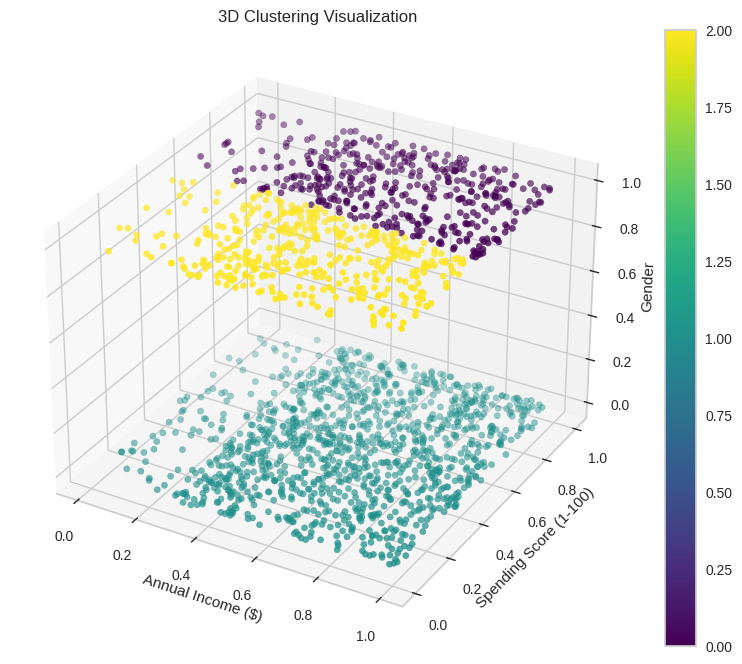

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Visualisasi 3D jika dataset memiliki lebih dari dua fitur
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting dengan 3D
scatter = ax.scatter(dataset['Annual Income ($)'], dataset['Spending Score (1-100)'], dataset['Gender'], c=labels_pca, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Annual Income ($)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Gender')
plt.title('3D Clustering Visualization')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Menganalisis karakteristik cluster
cluster_analysis = dataset.groupby('Cluster').agg(
    {
        'Annual Income ($)': ['mean', 'std', 'min', 'max'],
        'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
        'Gender': ['mean', 'std', 'min', 'max']
    }
)

# Menampilkan hasil analisis cluster
print(cluster_analysis)

        Annual Income ($)                                \
                     mean       std       min       max   
Cluster                                                   
0                0.592376  0.245444  0.000000  0.998295   
1                0.581941  0.241525  0.005264  1.000000   
2                0.576272  0.234161  0.010528  0.999847   

        Spending Score (1-100)                       Gender                 
                          mean       std   min   max   mean  std  min  max  
Cluster                                                                     
0                     0.746973  0.145049  0.49  1.00    1.0  0.0  1.0  1.0  
1                     0.509747  0.280326  0.00  1.00    0.0  0.0  0.0  0.0  
2                     0.276545  0.151273  0.01  0.53    1.0  0.0  1.0  1.0  


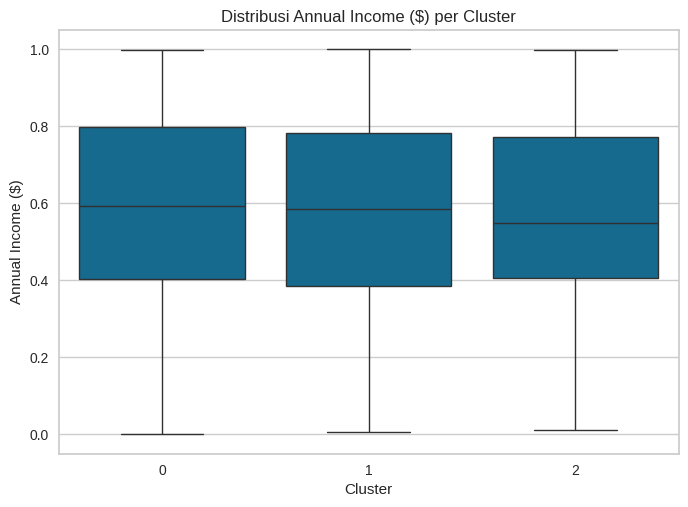

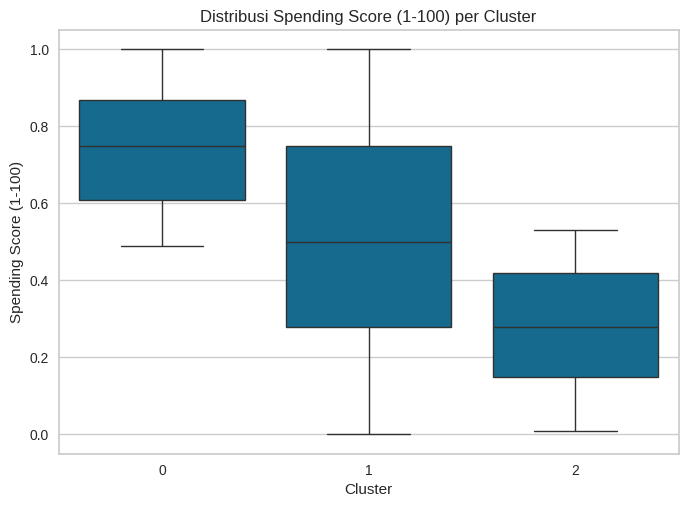

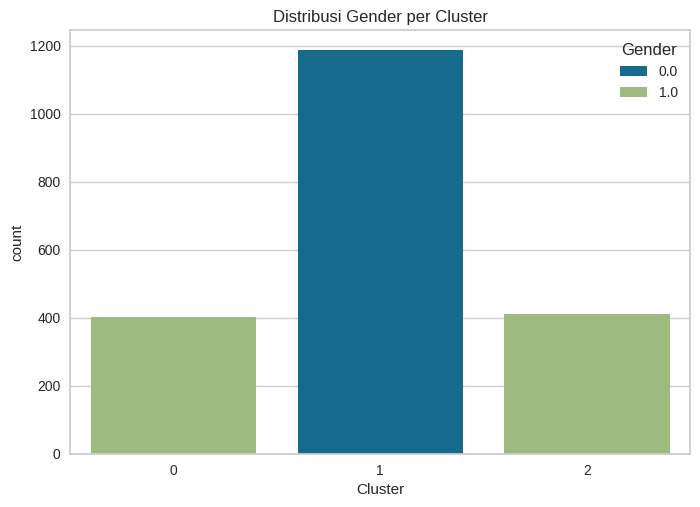

In [38]:
# Visualisasi distribusi Annual Income ($) untuk setiap cluster
sns.boxplot(x='Cluster', y='Annual Income ($)', data=dataset)
plt.title('Distribusi Annual Income ($) per Cluster')
plt.show()

# Visualisasi distribusi Spending Score (1-100) untuk setiap cluster
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=dataset)
plt.title('Distribusi Spending Score (1-100) per Cluster')
plt.show()

# Visualisasi distribusi Gender per cluster
sns.countplot(x='Cluster', hue='Gender', data=dataset)
plt.title('Distribusi Gender per Cluster')
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 1: Dominasi wanita dengan penghasilan tinggi dan kecenderungan pengeluaran tinggi. Mereka dapat dijadikan target untuk produk premium, fashion, atau hiburan.
2. Cluster 2: Mayoritas pria dengan penghasilan menengah dan pengeluaran moderat. Produk teknologi atau alat praktis bisa lebih cocok untuk mereka.
3. Cluster 3: Dominasi wanita dengan penghasilan lebih rendah dan kecenderungan pengeluaran rendah. Mereka lebih cocok dengan produk yang terjangkau dan fungsional.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
# Menambahkan hasil clustering (labels_pca) ke dataset asli
dataset['Cluster'] = labels_pca

# Mengekspor dataset yang telah diperbarui ke dalam file CSV
dataset.to_csv('hasil_clustering.csv', index=False)

print("Hasil clustering telah disimpan ke dalam file 'hasil_clustering.csv'.")


Hasil clustering telah disimpan ke dalam file 'hasil_clustering.csv'.
